## Loan Prediction
### Author: Adil Zia




#### Aims
The company wants to automate the loan eligibility process based on customer details provided while filling in an online application form. The aim here is to build a predictive model which accurately classifies new potential customers by their loan eligibility. 

#### Dataset Source
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/


### Contents:
1. **Import packages and Load data into Pandas** <br>

2. **Exploratory Data Analysis** <br>

3. **Data Cleaning** <br>
3.1 Basic Data cleaning - Modal value approach to replace missing values <br>
3.2 Basic+ Data cleaning - Utilising existing relationships to estimate missing values <br>
3.3 Sophisticated methods - Supervised learning model to replace missing values  

4. **Feature extraction/Transformation** <br>
4.1 Create new variable <br>
4.2 Log Transformations <br> 

5. **Machine learning:**  <br>
5.1 Categorical Variable encoding <br>
5.2 Function to automate the modelling process & output of performance metrics <br>
5.3 Implementing KNN, Logistic Regression, Decision Tree, Random Forest <br>
5.5 Conclusions <br>
5.6 Potential improvements: Recognising potential areas of improvement and more advanced methods which could further improve the results. 

#### Variable Descriptions:

- **Loan_ID:**                  >  Unique Loan ID <br>
- **Gender:**	                >  Male/ Female <br>
- **Married:**	                >  Applicant married (Y/N) <br>
- **Dependents:**	            >  Number of dependents <br>
- **Education:**	            >  Applicant Education (Graduate/ Under Graduate) <br>
- **Self_Employed:**	        >  Self employed (Y/N) <br>
- **ApplicantIncome:**	        >  Applicant income (Monthly) <br>
- **CoapplicantIncome:**	    >  Coapplicant income (Monthly) <br>
- **LoanAmount:**	            >  Loan amount in thousands <br>
- **Loan_Amount_Term:**	        >  Term of loan in months <br>
- **Credit_History:**	        >  Credit history meets guidelines <br>
- **Property_Area:**	        >  Urban/ Semi Urban/ Rural <br>
- **Loan_Status:**	            >  Loan approved (Y/N)

In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load our dataset into a Pandas dataframe
df = pd.read_csv("loanprediction.csv")   

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here we can quickly see some key statistics regarding our numerical columns.
- There are missing values in LoanAmount, Loan_Amount_Term, and Credit_History
- Applicant & Co-Applicant Income exhibit right skew (Mean > Median), and also have relatively large standard deviations. 
- 84% of people in our dataset have a credit history that meets guidelines



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Here we can see the data-types of each column aswell as the number of missing values present.

Clearly there are missing values present amongst several of our features. These missing values will need to be appropriately dealt with.


# 2: Exploratory Data Analysis

Data exploration allows us to spot key trends in our dataset, identify and correct for missing or outlier values, and can help us determine appropriate features to use in our final model.  <br>


### 2.1: Univariate Analysis - Continuous Variables


,Applicant Income,Co-Applicant Income
Mean,5403.459283,1621.245798
Median,3812.500000,1188.500000


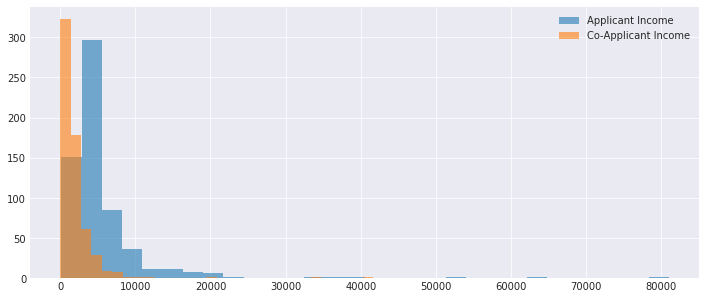

In [5]:
# EXPLORING APPLICANT INCOME & CO-APPLICANT INCOME

with sns.axes_style('darkgrid'):      # Seaborn Histogram Visualisation 
    plt.figure(figsize = (12,5))
    df['ApplicantIncome'].hist(bins = 30, alpha = 0.6, label = 'Applicant Income')
    df['CoapplicantIncome'].hist(bins = 30, alpha = 0.6, label = 'Co-Applicant Income')
    plt.legend()

    
# Calculate the Means, Medians of ApplicantIncome & Co-Applicant Income    
A_Median = np.median(df['ApplicantIncome'],0)
A_Mean = np.mean(df['ApplicantIncome'],0)
C_Median = np.median(df['CoapplicantIncome'],0)
C_Mean = np.mean(df['CoapplicantIncome'],0)

m_and_m = {'Applicant Income':{'Median':A_Median,'Mean':A_Mean},  # Pass into a dictionary
'Co-Applicant Income':{'Median':C_Median,'Mean':C_Mean}}

# Display in the form of a small dataframe
pd.DataFrame(data = m_and_m)




**The above graph reveals the following:** <br>
- The distributions are very right skewed, with extreme values. <br>
- ApplicantIncome tends to be higher than Co-ApplicantIncome
- To nullify the impact of extreme values, we could apply a **log-transformation** to these variables, before building our final model.

Median Graduate: 4000
Mean Graduate: 5857
Median Not Graduate 3357
Mean Not Graduate 3777


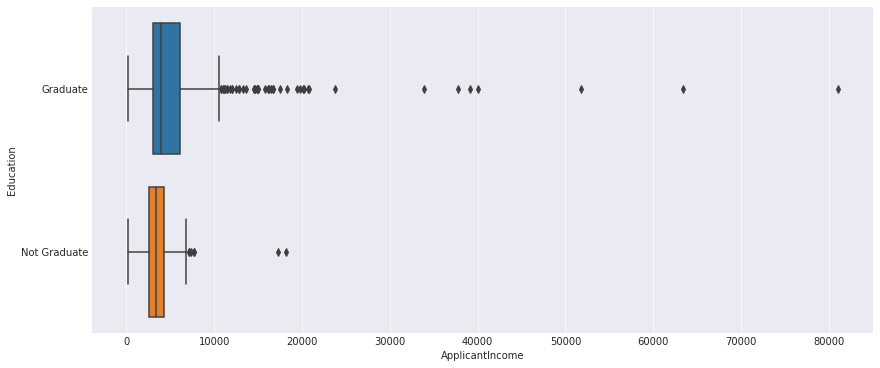

In [6]:
# Explore the relationship between EDUCATION and Applicant Income
# Assess Outlier values

with sns.axes_style('darkgrid'):
    plt.figure(figsize = (14,6))
    sns.boxplot(x='ApplicantIncome',y='Education',data=df,orient = 'h')
    
print ('Median Graduate: %d') %(np.median(df[df['Education'] == 'Graduate']['ApplicantIncome'],0))
print ('Mean Graduate: %d') %(np.mean(df[df['Education'] == 'Graduate']['ApplicantIncome'],0))
print ('Median Not Graduate %d') %(np.median(df[df['Education'] == 'Not Graduate']['ApplicantIncome'],0))
print ('Mean Not Graduate %d') %(np.mean(df[df['Education'] == 'Not Graduate']['ApplicantIncome'],0))

**Noticable in the above graph, is the relationship between education and the more extreme values of Income.** <br> 
Having an Education does not significantly increase the Median Income, however it is clear that it significantly increases the likelihood of an extreme income.

This gives us some intuition into the reason for existence of such a right-skewed distribution. In this case, I will assume these values to be genuine real-world values, reflecting the income disparity in society, rather than consider them to be erroneous outliers. 

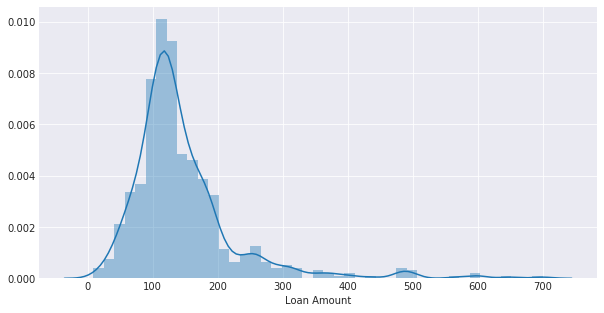

In [7]:
# Seaborn Histogram of LoanAmount

with sns.axes_style('darkgrid'):
    plt.figure(figsize = (10,5))
    sns.distplot(df['LoanAmount'].dropna(),axlabel = 'Loan Amount')  # DropNa arguement to ignore missing values 
    

Similarly, we see that LoanAmount is right skewed. Just as before, I will assume these are genuine data points which do not need to be removed. It seems feasible that some few individuals could requests a far larger loan value for specific needs. 

In [8]:
# Number of Applicants by credit history
temp1 = df['Credit_History'].value_counts(ascending = True, normalize = True)      

# Probability of receiving a Loan by credit history
temp2 = pd.crosstab(df['Credit_History'], df['Loan_Status'],normalize = 'index')

# Probability of credit_history by Loan_Status
temp2b = pd.crosstab(df['Loan_Status'],df['Credit_History'],normalize = 'index')
print 'Distribution of Applicant Pool'
print temp1
print
print 'Probability of Loan by Credit_History'
print temp2
print
print 'Probability of Credit_History by Loan'
print temp2b

Distribution of Applicant Pool
0.0    0.157801
1.0    0.842199
Name: Credit_History, dtype: float64

Probability of Loan by Credit_History
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789

Probability of Credit_History by Loan
Credit_History       0.0       1.0
Loan_Status                       
N               0.458101  0.541899
Y               0.018182  0.981818


**Conclusions regarding the above tables discussed below**


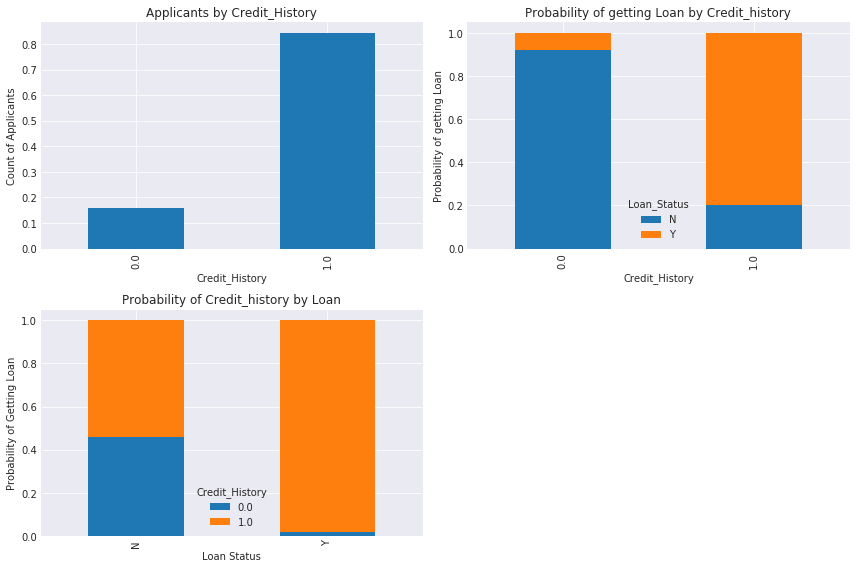

In [9]:
# Visualising the above tables 

#PLOT 1: Number of Applicants grouped by Credit History
with sns.axes_style('darkgrid'):    
    fig = plt.figure(figsize = (12,8))  
    ax1 = fig.add_subplot(221)         
    temp1.plot(kind = 'bar', ax = ax1)
    ax1.set_xlabel('Credit_History')      
    ax1.set_ylabel('Count of Applicants')
    ax1.set_title('Applicants by Credit_History')

#PLOT 2: Probability of recieving Loan by Credit History 
with sns.axes_style('darkgrid'):
    ax2 = fig.add_subplot(222)  
    temp2.plot(kind = "bar", stacked = True, ax = ax2) 
    ax2.set_xlabel('Credit_History') 
    ax2.set_ylabel('Probability of getting Loan')
    ax2.set_title('Probability of getting Loan by Credit_history')
    
#PlOT 3: Probability of Credit_History by Loan Status
with sns.axes_style('darkgrid'):
    ax3 = fig.add_subplot(223)  
    temp2b.plot(kind = "bar", stacked = True, ax = ax3) 
    ax3.set_xlabel('Loan Status') 
    ax3.set_ylabel('Probability of Getting Loan')
    ax3.set_title('Probability of Credit_history by Loan')

plt.tight_layout()

##### The above tables/graphs reveal some important insights about Credit_History.

- 85% of Applicants have a 1.0 Credit History
- Those with a 1.0 Credit history have an **80%** chance of receiving a loan
- Those without a 0.0 Credit history have an **8%** chance of receiving a Loan

##### Impact of Bayes Theorem
However, when looking at the probability of Credit_History by Loan, the result may surprise some people:
- Of those who receive a Loan, **98.2%** have a satisfactory 1.0 Credit History
- Of those who were rejected for a Loan, **54%** have a Satisfactory 1.0 Credit_History!

- ***This phenomenon is due to the distribution of the Applicant Pool. Only 15% of the Applicants have a bad 0.0 Credit History. ***

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


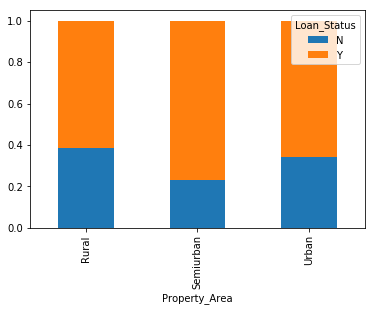

In [10]:
#Explore the relationship between Property_Area and Loan_Status
# Value counts
print df['Property_Area'].value_counts()
print
# Pivot Table, Probabilities of Receiving a Loan by Property Type
temp3 = pd.crosstab(index = df['Property_Area'],columns = df['Loan_Status'],normalize = 'index')
print temp3

# Plot the Probabilties of Receiving a Loan by Property Type, Stacked Bar Chart
temp3.plot(kind = 'bar', stacked = True)
plt.show()

It seems that living in a Semi-urban area increases the chance of being approved for a Loan. <br>
- Those in a Semi-Urban Area have a 77% chance of being accepted for a loan. <br>
- Those in Urban & Rural Areas have a 66% and 61% chance respectively. 


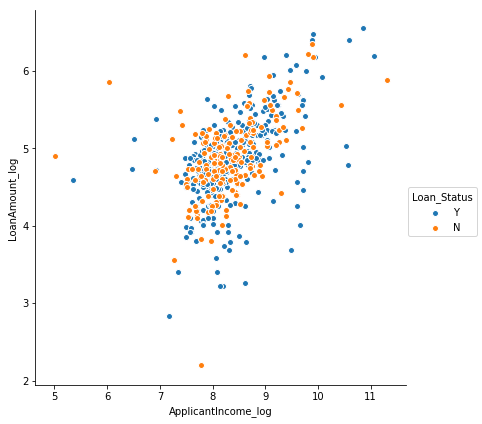

In [11]:
# Seaborn Scatter Plot, LoanAmount, ApplicantIncome, coloured by Loan_Status

# Log transform ApplicantIncome to nullify the effect of extreme values
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])

sns.pairplot(data = df, hue = 'Loan_Status', x_vars = 'ApplicantIncome_log', y_vars = 'LoanAmount_log', size = 6)
plt.show()

### This graph reveals that these two variables are not linearly seperable. 
- The aim of the above plot? To see if there is any 'linear seperability' over the two variables in comparison with respect to Loan_Status classificiation. <br>
- It seems that lower values of 'LoanAmount' correlate with a higher rate of Loan Acceptance due to the density of blue dots.<br>

## 3.0 DATA CLEANING
- There were no typo's 
- There are missing values in 7 columns which required replacing with appropriate estimated values
- I used the modal/median value to replace missing values in 5 columns with ~65 to 85% accuracy.

#### Using existing relationships to create improved estimates 
- For Dependents, I used the 'Married' Status variable to help create a better estimate for No. Dependents.

In [13]:
# CHECKING FOR TYPOS

for column, row in df.iloc[:,1:].iteritems():     
    if df[column].dtype == 'object':              # Iterate only if data-type is object
        print df[column].unique()                 # Display a list of the unique values in that column

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


** As demonstrated above, the list of unique values in each category is exactly as we would expect. This reveals that there are no typo's. There are however, clearly missing values, which we will take care of below. **

In [14]:
# Count & Display how many Null values are in each column 
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log         22
TotalIncome             0
TotalIncome_log         0
dtype: int64

#### 3.1 Cleaning the categorical variables: Loan_Amount_Term, Gender, Credit_History, Married and Self_Employed 
- Approach: Replacing with modal values for ~65% to 85% accuracy



In [15]:
#LOAN AMOUNT TERM NULL VALUES:
df['Loan_Amount_Term'].value_counts(1)                   # 85% of people have loan term of 360
df['Loan_Amount_Term'].fillna(360, inplace = True)       # Impute Null values with '360'

#GENDER NULL VALUES:
df['Gender'].value_counts(1)                             # 81% in this dataset are Male  
df['Gender'].fillna('Male', inplace = True)              # Impute Null values with 'Male'

#CREDIT HISTORY NULL VALUES:
df['Credit_History'].value_counts(1)                     # 85% have a credit History
df['Credit_History'].fillna(1.0, inplace = True)         # Impute Null values with '1.0'
        
#MARRIED NULL VALUES
df['Married'].value_counts(1)                            # 65% are Married 
df['Married'].fillna('Yes', inplace = True)              # Imput Null Values with 'Yes'

#SELF EMPLOYED NULL VALUES
df['Self_Employed'].value_counts(1)                      # 85% are not Self_Employed
df['Self_Employed'].fillna('No',inplace=True)            # Impute Null values with 'No'


print df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID                 0
Gender                  0
Married                 0
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log         22
TotalIncome             0
TotalIncome_log         0
dtype: int64


### 3.2 Cleaning the Dependents variable

**Approach:**
I used the 'Married' Status variable to help create a better estimate for the number of Dependents.<br>
- Those who are Married  had a median value of 1.0 Dependents.
- Those who were not Married had a median value of 0.0 Dependents. 

To enable this calculation, I first converted the data-type from 'object' to a numerical format - This required converting the '3+' category into '3'. 

In [16]:
# Iterate and convert all '3+' values into 3, enabling data-type conversion

for index, value in df['Dependents'].iteritems():
    if df['Dependents'].iloc[index] == '3+':
        df['Dependents'].loc[index] = 3

        
# Convert the data-type to float, enabling calculation
df['Dependents'] = df['Dependents'].astype('float64')

print 'Datatype of Dependents: %s' %df['Dependents'].dtype  # Confirm the data-type succesfully changed


# Pivot Table displaying the median value of Dependents grouped by marriage status
dep_Piv = df.pivot_table(values = 'Dependents',index = 'Married', aggfunc = np.median)
print dep_Piv

# RESULT: Median Dependents for Married is 1.0, Median for Non-Married is 0.0


# Conditionally replace missing values with these estimated values 
df["Dependents"].fillna(df.groupby("Married")["Dependents"].transform("median"), inplace = True)


# ERROR - SEE BELOW. "A value is trying to be set on a copy of a slice from a dataframe". 
# I was sure the above code from stackoverflow fixed this?


/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Datatype of Dependents: float64
         Dependents
Married            
No              0.0
Yes             1.0


### 3.3 Sophisticated Data Cleaning Approach: 

**Using a multiple linear regression to estimate the missing LoanAmount values** <br>

The model is built upon 2 predictor variables: TotalIncome_log, Loan_Amount_Term

**The model achieves a RMSE score of 46.5, and a R^2 score of 0.53.** <br>

In [219]:
# Create new variable - TotalIncome_Log
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']  
# Apply a log transformation
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [223]:
# Import required packages for multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train, test split the dataset
# Since LoanAmount has missing values, use pd.notnull to access all non-missing values
X_lm = df[pd.notnull(df['LoanAmount'])][['TotalIncome_log','Loan_Amount_Term']]
y_lm = df[pd.notnull(df['LoanAmount'])]['LoanAmount']
X_train, X_test, y_train, y_test = train_test_split(X_lm,y_lm,test_size = 0.2,random_state = 10)

In [224]:
# Instantiate and train the linear regression
reg = LinearRegression(fit_intercept = True,normalize = True)
reg.fit(X_train,y_train)

# Display the coefficients of the model for interpretation
columns = list(X_train.columns)
columns.append('Bias')
weights = np.append(reg.coef_,reg.intercept_)

pd.DataFrame(weights,index = columns,columns = ['Values'])

,Values
TotalIncome_log,110.398803
Loan_Amount_Term,0.079676
Bias,-836.441204


In [226]:
# Use the model to make predictions on the training and testing set
test_predictions = reg.predict(X_test)
train_predictions = reg.predict(X_train)

### Checking the Model is Valid: Testing the assumptions of the Linear regression 
** There are 5 main assumptions the Linear regression model makes. I will now test how well these assumptions hold true**
- There is a linear relationship between the predictors and predicted
- The errors are distributed normally with N(0,o^2)
- The variance o^2 is constant, the same variance regardless of the value of X
- The error terms are uncorrelated and indepdent 
- Little or no multicolinearity in the data (The features used are uncorrelated)



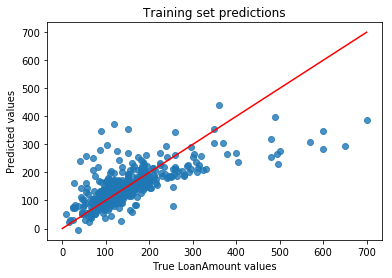

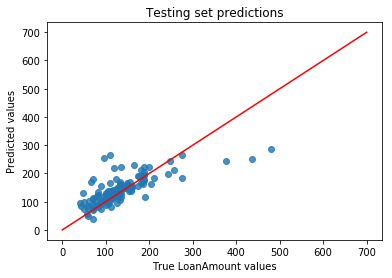

In [227]:
# Display the performance of the model visually 


# To plot the 45 degree diagonal line - Represents perfect predictions
xx = np.linspace(0,700,100)
yy = np.linspace(0,700,100)


# Plot of Predictions vs Actual with 45 degree perfect line displayed
plt.figure()
sns.regplot(y_train,train_predictions,fit_reg = False)
plt.plot(xx,yy,'r')
plt.title("Training set predictions")
plt.xlabel('True LoanAmount values')
plt.ylabel('Predicted values')


plt.figure()
sns.regplot(y_test,test_predictions, fit_reg = False)
plt.plot(xx,yy,'r')
plt.title('Testing set predictions')
plt.xlabel('True LoanAmount values')
plt.ylabel('Predicted values')

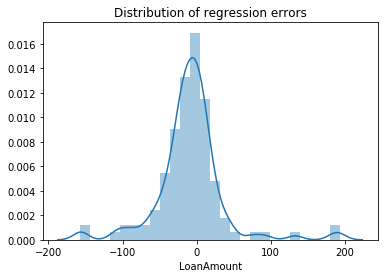

In [228]:
# Evaluate the validity of the model - Plot the distribution of the errors
plt.figure()
sns.distplot(y_test - test_predictions)
plt.title("Distribution of regression errors")

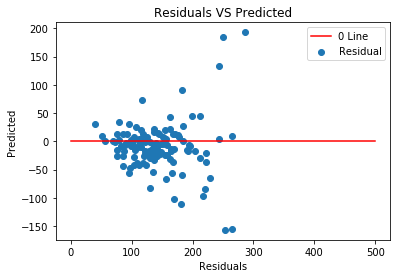

In [229]:
plt.scatter(test_predictions,(y_test-test_predictions),label = 'Residual')
plt.plot(np.linspace(0,500,100),[0]*100,'r', label = '0 Line')
plt.legend()
plt.title('Residuals VS Predicted')
plt.xlabel('Residuals')
plt.ylabel('Predicted')

### Is the model valid?
The investigation reveals that: <br>
- The **constant variance** assumption is violated
- There is still some pattern left within the data which is not being accounted for by the model.
- The errors are normally distributed

#### Answer: No, the model is statistically flawed

### How does the model perform?

In [230]:
# Evaluate the performance of the linear regression 
from sklearn import metrics 

# Root Mean Squared Error
print np.sqrt(metrics.mean_squared_error(y_test,test_predictions))

# R^2 Metric
print reg.score(X_test,y_test)

46.4782518488
0.52848306179


### These results show that the regression is predicting LoanAmount values reasonably well.
**The RMSE score is 47 and the R^2 score is 0.52** <br>

** Although the assumptions of the linear regression are violated, The model performs decently. I'm not going to be too much of a perfectionist here, as this project is just a learning experience for me. So I will still use the model. **

### Next step: Using the model predictions to replace the missing values of LoanAmount 

- To do this, I have created a function which returns the models prediction for an individual row.
I have then iterated over the dataframe, and if the LoanAmount value is missing, I have replaced it's value with the models prediction. 

In [231]:
# Function which generates the models prediction for a specified row in the dataframe
def PredictLA(row):
    x_variables = row[['TotalIncome_log','Credit_History','Loan_Amount_Term']].reshape(1,-1)
    prediction = reg.predict(x_variables)
    return prediction


# Iterating over the dataframe
for index, value in df['LoanAmount'].iteritems():
    
# IF the LoanAmount value is missing...

    if np.isnan(df['LoanAmount'].iloc[index]):
        x_variables = df.iloc[index][['TotalIncome_log','Credit_History','Loan_Amount_Term']].reshape(1,-1)
        prediction = reg.predict(x_variables)
        
# ... Replace it with the prediction!
        df['LoanAmount'].iloc[index] = prediction
    
# Show us if there are any missing values in any column remaining
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncome_log     0
LoanAmount_log          0
TotalIncome             0
TotalIncome_log         0
Loan_Amount_Term_Log    0
Loan_Status_Mapped      0
dtype: int64

### Success! There are no more missing values left. All data cleaning has been completed

## 4.0 Feature extraction/Transformation  

### 4.1 New Feature
- **TotalIncome** = ApplicantIncome + CoApplicantIncome
I decided to use this feature because we might imagine that Applicant Income & Co-Applicant income would contribute to an applicants ability to pay back a Loan. 


### 4.2 Log Transformations
- The LoanAmount, ApplicantIncome and Co-ApplicantIncome variables exhibited a right-skewed distribution. <br>
- We can apply a log transformation which will nullify the effect of extreme values, and produce a more 'normal' shaped distribution which can give us better results.

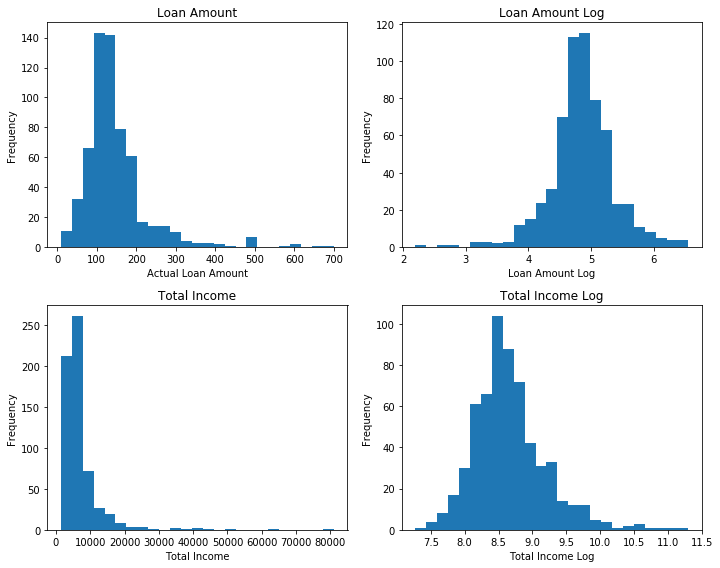

In [126]:
#Combine incomes to a new variable: Total Income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']  

#Apply the log transformations
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome_log'] = np.log(df['TotalIncome'])


fig = plt.figure(figsize = (10,8)) 
ax1 = fig.add_subplot(221) 
df['LoanAmount'].plot(kind = 'hist', bins = 25, ax = ax1)
ax1.set_xlabel('Actual Loan Amount') 
ax1.set_ylabel('Frequency')
ax1.set_title('Loan Amount')

ax2 = fig.add_subplot(222)         
ax2.set_xlabel('Loan Amount Log')      
ax2.set_ylabel('Frequency')
ax2.set_title('Loan Amount Log')
df['LoanAmount_log'].plot(kind = 'hist',bins = 25, ax = ax2)

ax3 = fig.add_subplot(223)
df['TotalIncome'].plot(kind = 'hist',bins = 25, ax = ax3)
ax3.set_xlabel('Total Income') 
ax3.set_ylabel('Frequency')
ax3.set_title('Total Income')

ax4 = fig.add_subplot(224)
df['TotalIncome_log'].plot(kind = 'hist',bins = 25, ax = ax4)
ax4.set_xlabel('Total Income Log') 
ax4.set_ylabel('Frequency')
ax4.set_title('Total Income Log')

plt.tight_layout()


## 5.0 Machine Learning
### 5.1 Categorical Variable Encoding: 
Encoding the categorical variables into indicator/dummy variables: 

**Approach:** I am using one-hot encoding over other approaches such as LabelEncoder, because the categorical variables in consideration are 'unordered'. One-hot encoding maintains this via a binary nature, whereas LabelEncoding generates a column of numerical labels which implies an order. This can be misleading for algorithms which run based off 'distance' calculations.

In [236]:
# Encoding the categorical variables and assigning to a new dataframe called "df2"

df2 = pd.get_dummies(df,columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],
              drop_first = True)

df2.head()    # Displaying the new dataframe

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,LoanAmount_log,TotalIncome,TotalIncome_log,Loan_Amount_Term_Log,Loan_Status_Mapped,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,0.0,5849,0.0,149.295738,360.0,1.0,8.674026,5.005929,5849.0,8.674026,5.886104,1.0,1,0,0,0,0,1,1
1,LP001003,1.0,4583,1508.0,128.000000,360.0,1.0,8.430109,4.852030,6091.0,8.714568,5.886104,0.0,1,1,0,0,0,0,0
2,LP001005,0.0,3000,0.0,66.000000,360.0,1.0,8.006368,4.189655,3000.0,8.006368,5.886104,1.0,1,1,0,1,0,1,1
3,LP001006,0.0,2583,2358.0,120.000000,360.0,1.0,7.856707,4.787492,4941.0,8.505323,5.886104,1.0,1,1,1,0,0,1,1
4,LP001008,0.0,6000,0.0,141.000000,360.0,1.0,8.699515,4.948760,6000.0,8.699515,5.886104,1.0,1,0,0,0,0,1,1


In [237]:
#Import required packages
# Packages for performance metric analysis
from sklearn.cross_validation import KFold   
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Packages for algorithm implementation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Split Dataframe into X predictor variables and target variable Y

In [243]:
# Dataframe of X variables
X = df2.drop(['Loan_ID','Loan_Status_Y'], axis = 1)

# Dataframe of the outcome variable, Loan_Status
y = df2['Loan_Status_Y']

### K-Fold Cross Validation
- I have decided to use K-Fold Cross validation instead of train/test split <br>
**Reasoning:** <br>
K-Fold provides a better estimate of out-of sample accuracy with lower variance. Also, the dataset is small (614) rows, so we benefit from K-Fold making full use of the entire training set. Also, the extra computational cost of K-Fold is irrelevent because the dataset in consideration is small. 

### Function to automate the modelling process: 
#### Outputs Accuracy score and Cross Validation accuracy score

In [239]:
def classify_model(model,X,y):
    
    # Fit the model:
    model.fit(X,y)
  
    # Make predictions on training set:
    predictions = model.predict(X)
    
    # Training set confusion matrix
    cf = confusion_matrix(y,predictions)
    print 'Training confusion Matrix'
    print cf
    print
    print metrics.classification_report(y,predictions)
  
    # Print *training* accuracy
    accuracy = metrics.accuracy_score(predictions,y)
    print "Training set accuracy : %s" % "{0:.3%}".format(accuracy)    

    kf = KFold(X.shape[0], n_folds=10)
    scores = []
    aggregate_confusion = np.zeros((2,2))
    
    for train, test in kf:
        
        # Filter training and test data
        X_train = X.iloc[train,:]
        y_train = y.iloc[train]
        X_test = X.iloc[test,:]
        y_test = y.iloc[test]
    
        # Fit the model using X_train and y_train
        model.fit(X_train, y_train)
    
        # Record error from each cross-validation run
        scores.append(model.score(X.iloc[test,:], y.iloc[test]))
        
        # Make Predictions
        predictionsCV = model.predict(X_test)
        
        # Confusion matrix at iteration (trained on 4/5th's of data set)
        confusion = confusion_matrix(y_test,predictionsCV)
        # Aggregated Confusion Matrix
        aggregate_confusion += confusion
    
    AC = pd.DataFrame(aggregate_confusion)
    average = float(sum(scores))/ float(len(scores))
    
    print 'Aggregated Confusion Matrix:'
    print AC
    print
    print 'KFold Accuracy: %s' %"{0:.3%}".format(average)
    
    #return {'AC':AC,'scores': scores,'average': average}

### KNeighbors Classifier: Parameter tuning using GridSearchCV

In [233]:
# Import packages for KNN
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [245]:
# Implement Grid search for the optimal value of k_neighbours for the model
param_grid = {'n_neighbors': np.arange(3, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 19}

### KNeighbours: Train model and output performance metrics:

In [253]:
# Instantiate KNN with the optimal parameter
knn = KNeighborsClassifier(n_neighbors = 19)

# Select the variables to use in the KNN Model
predictor_variables = X[['Credit_History','TotalIncome_log','LoanAmount_log']]

# Train the KNN Model using the optimal parameter and our custom function
classify_model(knn,predictor_variables,y)

Training confusion Matrix
[[ 83 109]
 [  9 413]]

             precision    recall  f1-score   support

          0       0.90      0.43      0.58       192
          1       0.79      0.98      0.87       422

avg / total       0.83      0.81      0.78       614

Training set accuracy : 80.782%
Aggregated Confusion Matrix:
      0      1
0  81.0  111.0
1   9.0  413.0

KFold Accuracy: 80.471%


### Logistic Regression

In [250]:
# Logistic Regression
model = LogisticRegression()
predictor_var = X[['Credit_History']]

classify_model(model,predictor_var,y)



Training confusion Matrix
[[ 82 110]
 [  7 415]]

             precision    recall  f1-score   support

          0       0.92      0.43      0.58       192
          1       0.79      0.98      0.88       422

avg / total       0.83      0.81      0.78       614

Training set accuracy : 80.945%
Aggregated Confusion Matrix:
      0      1
0  82.0  110.0
1   7.0  415.0

KFold Accuracy: 80.960%


### Random Forest

In [254]:
# Random Forest Algorithm

# Model using all available features
RF = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Dependents', 
                 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Amount_Term', 'Credit_History', 
                 'LoanAmount_log','TotalIncome_log']

classify_model(RF,X[predictor_var],y)

Training confusion Matrix
[[192   0]
 [  0 422]]

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       192
          1       1.00      1.00      1.00       422

avg / total       1.00      1.00      1.00       614

Training set accuracy : 100.000%
Aggregated Confusion Matrix:
      0      1
0  92.0  100.0
1  32.0  390.0

KFold Accuracy: 78.525%


In [255]:
#DataFrame showing which features are most important:
featimp = pd.DataFrame(RF.feature_importances_, 
                       index=predictor_var,columns = ['Importance']).sort_values(['Importance'],ascending = False)

featimp

,Importance
TotalIncome_log,0.269017
Credit_History,0.247432
LoanAmount_log,0.240023
Dependents,0.053966
Loan_Amount_Term,0.040635
Property_Area_Semiurban,0.030175
Married_Yes,0.028516
Property_Area_Urban,0.023293
Gender_Male,0.023147
Education_Not Graduate,0.021945


I will use the top 5 features listed above and re-try the random forest algorithm

In [265]:
RF2 = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=7, max_features=5)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Loan_Amount_Term']
classify_model(RF2,df2[predictor_var],y)

Training confusion Matrix
[[102  90]
 [ 13 409]]

             precision    recall  f1-score   support

          0       0.89      0.53      0.66       192
          1       0.82      0.97      0.89       422

avg / total       0.84      0.83      0.82       614

Training set accuracy : 83.225%
Aggregated Confusion Matrix:
      0      1
0  90.0  102.0
1  19.0  403.0

KFold Accuracy: 80.307%


## Potential Improvements:

**If I had the time to continue making improvements to this project, here are some ideas for how I would go about doing so:**
    
1. It would be worth trying a **gradient boosting** method such as XgBoost or Adaboost and seeing if this increases performance. There's got to be a reason they are featured in so many kaggle winning competitions! :) 

2. **The parameters** of each algorithm can drastically influence performance. It would definitely be worth spending more time fine-tuning these parameters to find those that are optimal.

3. **Smart/Creative Feature extraction** - Finding those features which are the most discriminative/useful is an art and a science and has been the driving force behind many Kaggle winning solutions. I could spend more time trying to derive useful/discriminative features.